In [ ]:
!./download-images.sh
%pip install -r requirements.txt

In [2]:
from src.utils import *
from src.services import *

# Calculate Contrast

In [4]:

image_num = 1
image =  open_image_as_grayscale(image_num)
matrix = convert_pillow_image_to_2d_matrix(image)
print(f'contrast of Image num {image_num} is {calculate_contrast(matrix)}')

2023-10-18 22:31:47.706 | INFO     | src.utils:open_image_as_grayscale:12 - Opening image from path: 1
2023-10-18 22:31:47.770 | INFO     | src.utils:convert_pillow_image_to_2d_matrix:17 - Converting pillow image to 2d matrix
2023-10-18 22:31:49.111 | INFO     | src.services:calculate_co_occurrence_matrix:16 - Calculating co-occurrence matrix
2023-10-18 22:31:50.241 | INFO     | src.services:calculate_contrast:43 - Calculating contrast


contrast of Image num 1 is 8166144


# Calculate Histograms

2023-10-18 22:31:50.263 | INFO     | src.services:calculate_image_histogram:56 - Calculating histogram


2023-10-18 22:31:50.740 | INFO     | src.utils:plot_histogram:51 - Plotting histogram for image: 1


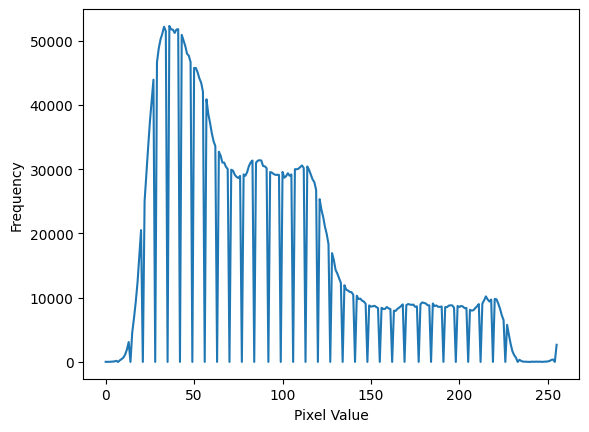

<Figure size 640x480 with 0 Axes>

In [5]:
histogram = calculate_image_histogram(matrix)
plot_histogram(histogram, image_num)

2023-10-18 22:31:54.265 | INFO     | src.services:calculate_cumulative_histogram:68 - Calculating cumulative histogram
2023-10-18 22:31:54.271 | INFO     | src.utils:plot_histogram:51 - Plotting histogram for image: 1 cumulative


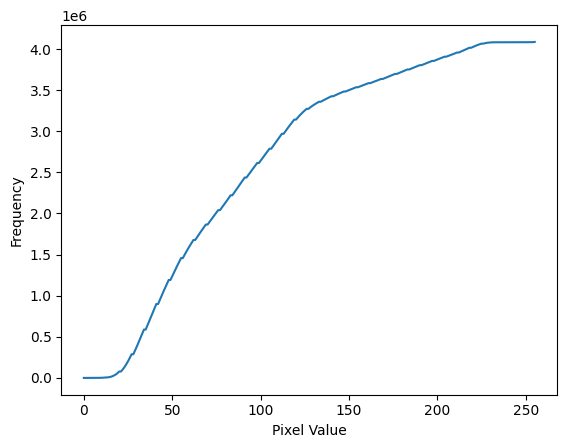

<Figure size 640x480 with 0 Axes>

In [6]:
cumulative = calculate_cumulative_histogram(histogram)
plot_histogram(cumulative, f'{image_num} cumulative')


In [31]:
get_color_at_percentage(cumulative_histogram=cumulative, percentage=0.05)

2023-10-18 22:35:47.645 | INFO     | src.services:get_color_at_percentage:77 - Getting color at percentage: 0.05


(19, 2670)

# Image Enhancements

## Contrast Stretching

2023-10-18 22:32:11.434 | INFO     | src.utils:open_image_as_grayscale:12 - Opening image from path: 1
2023-10-18 22:32:11.491 | INFO     | src.utils:show_image:63 - Showing image


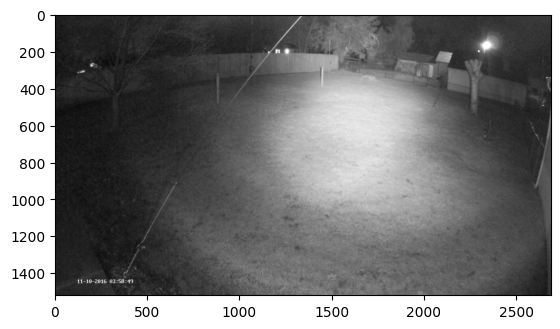

In [10]:
old_image =  open_image_as_grayscale(image_num)
show_image(old_image)

2023-10-18 22:36:08.967 | INFO     | src.services:contrast_stretch:85 - Contrast stretching
2023-10-18 22:36:10.066 | INFO     | src.utils:show_image:63 - Showing image


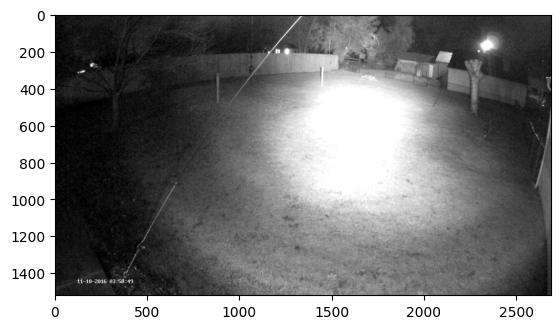

In [33]:
new_image = contrast_stretch(matrix, a=0, b=255, c=19, d=200)
show_image(new_image)